# Statistics

## Motivation

So far, we have often looked at data. For example, in [Chapter 3](03_Data-Exploration) we visually analyzed the distributions of data. Below are two histograms of data that we could also visually analyze.

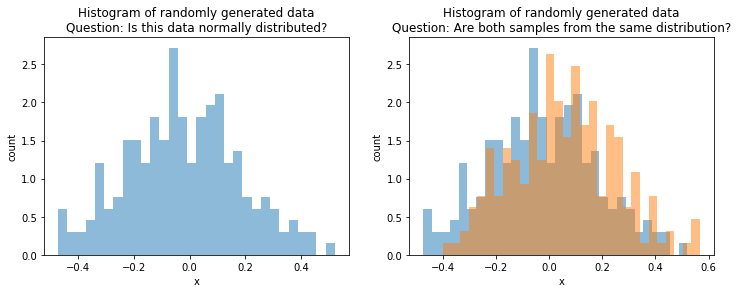

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# generate data
np.random_state = 42
mu, sigma = 0, 0.2 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 200)
s2 = np.random.normal(mu+0.05, sigma, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(s1, 30, density=True, alpha=0.5)
axes[0].set_title("Histogram of randomly generated data\nQuestion: Is this data normally distributed?")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(s1, 30, density=True, alpha=0.5)
axes[1].hist(s2, 30, density=True, alpha=0.5)
axes[1].set_title("Histogram of randomly generated data\nQuestion: Are both samples from the same distribution?")
axes[1].set_xlabel("x")
axes[1].set_ylabel("count")

plt.show()

The histogram on the left looks like it has a bell shape, which indicates that the data may be normal. However, we cannot be sure, without additional analysis. It could would also be possible that the data just randomly looks like that, i.e., is some outlier and that the data is not really normal. 

The histogram on the left shows two samples, to which we refer in the following as "blue" and "orange". Both look similar, but it looks like the mean value of the blue data may be a bit smaller than that of the orange data. However, this could also just be a random effect, and there is no real difference. 

Statistics gives us the methods we need to get (probabilistic) answers to these questions. Within this Chapter, we give a short introduction into the (quite large) world of statistics. Upon completion of this chapter, you should know what hypothesis testing is, how this can be used correctly, and why hypothesis testing is often not useful, if used without additional statistical tools like effect size and confidence intervals. 

## Hypothesis Testing

Hypothesis testing is the primary tool of *frequentist statistics*. The idea behind hypothesis testing is the following. If we have certain assumptions on the data, we can formulate these assumptions as an hypothesis about the data. We always have two hypothesis, the *null hypothesis* and the *alternative hypothesis*. 

- Null Hypothesis ($H_0$): Assumption of the test holds and is failed to be rejected at some level of significance.
- Alternative Hypothesis ($H_1$, $H_a$): Assumption of the test does not hold and is rejected at some level of significance.

The question is, what these abstract concept mean. What exactly is the assumption of a test? What does "(failed to be) rejected at some level of significance" mean? Since these questions are often misunderstood and misused, we explain them using the example of the $t$-test. 

### $t$-Test

The $t$-Test can be seen as the father of all statistical tests and was first introduced by William Gosset under the pseodonym "Student". This oldest version of the test and the related probability distribution are there called Student's $t$-Test and Student's distribution. Here, we consider a newer variant of the $t$-Test, i.e., Welch's $t$-Test. Welch's $t$-Test has the following null and alternative hypotheses: 

- $H_0$: The means of two normally distributed populations $X_1$ and $X_2$ are equal.
- $H_a$: $X_1$ and $X_2$ are not from two normally distributed populations with equal mean values.

Thus, this test can be used to determine if two normally distributed populations have the same mean value. This is relevant in many use cases, e.g., to answer questions like "does this medication improve the health" or "is my deep neural network better than a random forest". Please note that the alternative hypothesis of the $t$-Test is not that the mean values are different. Only if both distributions are normal, this would mean that the mean values are different. If one of the populations is not normally distributed, we do not know whether the null hypothesis was rejected because the data was not normal or because the means are different. This misinterpretation of alternative hypothesis is one of the common mistakes when hypothesis testing is used. 

In order to determine evaluate whether the null hypothesis holds, hypothesis testing evaluates *how likely the data is, given the hypothesis*. For the $t$-Test this means that we want to calculate how likely it is that we observe the populations $X_1$ and $X_2$, in case both are normally distributed with the same mean value. This probability is the infamous *$p$-value*.

To determine the p-value, we need the probability density function of a test statistic. In case of the $t$-Test, this is Student's $t$-Distribution.

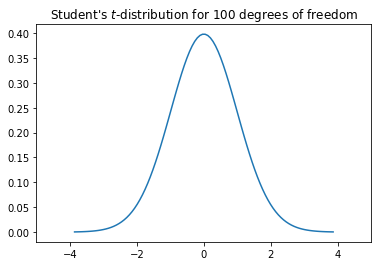

In [11]:
from scipy import stats

rv = stats.t(df=100, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.figure()
plt.title("Student's $t$-distribution for 100 degrees of freedom")
plt.xlim(-5,5)
plt.plot(x,y)
plt.show()

This distribution looks similar to the normal distribution, the difference is that the tails are a bit longer than those of the normal distribution. Student's $t$-distribution is defined as the distribution of the  deviation of the arithmetic mean of a sample drawn from a standard normal distribution with a mean value of 0 and a standard deviation of 1 deviates. Thus, the $t$-Distribution tells us how much deviation of the mean values between two samples drawn from a standard normal distributions we can expect. This is directly related to the likelihood of the data, given the hypothesis that data is normal. 

The difference we still have is that the $t$ distribution is for a specific mean value and standard deviation, while our hypothesis is for normal distributions with any mean value and standard distribution. 

$$t = \frac{mean(X_1)-mean(X_2)}{\sqrt{\frac{sd(X_1)^2}{N_1}+\frac{sd(X_2)}{N_2}}}$$

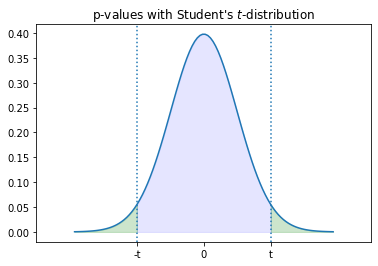

In [14]:
tvalue = 2
xfill = np.linspace(-tvalue, tvalue)
xfill_left = np.linspace(rv.ppf(0.0001),-tvalue)
xfill_right = np.linspace(rv.ppf(0.9999),tvalue)

plt.figure()
plt.title("p-values with Student's $t$-distribution")
plt.axvline(tvalue, linestyle=':')
plt.axvline(-tvalue, linestyle=':')
plt.xlim(-5,5)
plt.xticks([-tvalue,0,tvalue], ['-t','0','t'])
plt.plot(x,y)
plt.fill_between(xfill, rv.pdf(xfill), y2=0, alpha=0.1, color='b')
plt.fill_between(xfill_left, rv.pdf(xfill_left), y2=0, alpha=0.2, color='g')
plt.fill_between(xfill_right, rv.pdf(xfill_right), y2=0, alpha=0.2, color='g')
plt.show()

In [8]:
from textwrap import TextWrapper

wrapper = TextWrapper(width=65)
def wrap_print(string):
    print('\n'.join(wrapper.wrap(string)))


alpha = 0.005
pval_shapiro1 = stats.shapiro(s1)[1]
pval_shapiro2 = stats.shapiro(s2)[1]

wrap_print('p-value of Shapiro-Wilk test for "blue" data:   %.4f' % pval_shapiro1)
if pval_shapiro1>alpha:
    wrap_print('The test found that the data sample was normal, failing to reject the null hypothesis at significance level alpha=%.3f.' % alpha)
else:
    wrap_print('The test found that the data sample was not normal, rejecting the null hypothesis at significance level alpha=%.3f.' % alpha)

print()
print('p-value of Shapiro-Wilk test for "orange" data: %.4f' % pval_shapiro2)
if pval_shapiro1>alpha:
    wrap_print('The test found that the data sample was normal, failing to reject the null hypothesis at significance level alpha=%.3f.' % alpha)
else:
    wrap_print('The test found that the data sample was not normal, rejecting the null hypothesis at significance level alpha=%.3f.' % alpha)
print()

if pval_shapiro1>alpha and pval_shapiro2>alpha:
    wrap_print("Both populations normal. Using Welch's t-test.")
    pval_equal = stats.ttest_ind(s1,s2,equal_var=False)[1]
else:
    wrap_print("At least one population not normal. Using Mann-Whitney U-test.")
    pval_equal = stats.mannwhitneyu(s1,s2,alternative='two-sided')[1]
    
print()    
wrap_print("p-value of Welch's t-tests: %f" % pval_equal)
if pval_equal>alpha:
    wrap_print('The test found that the population means are equal, failing to reject the null hypothesis at significance level alpha=%.3f.' % alpha)
else:
    wrap_print('The test found that the population means are not equal, rejecting the null hypothesis at significance level alpha=%.3f.' % alpha)

p-value of Shapiro-Wilk test for "blue" data:   0.7442
The test found that the data sample was normal, failing to reject
the null hypothesis at significance level alpha=0.005.

p-value of Shapiro-Wilk test for "orange" data: 0.4496
The test found that the data sample was normal, failing to reject
the null hypothesis at significance level alpha=0.005.

Both populations normal. Using Welch's t-test.

p-value of Welch's t-tests: 0.000096
The test found that the population means are not equal, rejecting
the null hypothesis at significance level alpha=0.005.


## Effect Sizes

In [25]:
from statistics import mean, stdev
from math import sqrt

s = sqrt( ((len(s1)-1)*stdev(s1)**2 + (len(s2)-1)*stdev(s2)**2)/(len(s1)+len(s2)-2))
cohens_d = (mean(s1) - mean(s2)) / s

if abs(cohens_d)<0.01:
    effsizestr = "very small"
elif abs(cohens_d)<0.2:
    effsizestr = "small"
elif abs(cohens_d)<0.5:
    effsizestr = "medium"
elif abs(cohens_d)<0.8:
    effsizestr = "large"
elif abs(cohens_d)<1.2:
    effsizestr = "very large"
else:
    effsizestr = "huge"

print("Effect size (Cohen's d): %.3f - %s effect size" % (cohens_d, effsizestr))

Effect size (Cohen's d): -0.394 - medium effect size


## Confidence Intervals

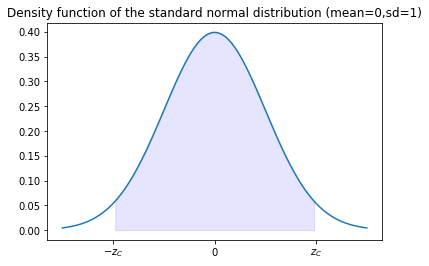

In [22]:
from math import sqrt
from scipy.stats import norm

mu = 0
sigma = 1
zc = 1.96
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)
xfill = np.linspace(-zc, zc)

plt.figure()
plt.title("Density function of the standard normal distribution (mean=0,sd=1)")
plt.fill_between(xfill, norm.pdf(xfill), y2=0, alpha=0.1, color='b')
plt.xticks([-tvalue,0,tvalue], ['$-z_C$','0','$z_C$'])
plt.plot(x,y)
plt.show()

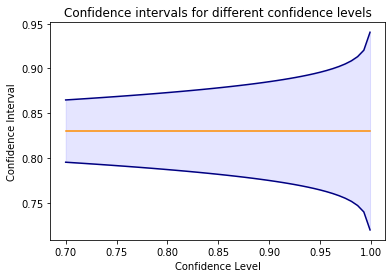

In [21]:
mymu = 0.83
mysd = 0.13
myn = 15

x = np.linspace(0.7, 0.999)
y_upper = 0.83+norm.ppf((1-x)/2)*mysd/sqrt(myn)
y_lower = 0.83-norm.ppf((1-x)/2)*mysd/sqrt(myn)
plt.figure()
plt.plot()
plt.plot(x,y_upper, color='navy')
plt.plot(x,y_lower, color='navy')
plt.plot([0.7,0.999],[0.83,0.83], color='darkorange')
plt.fill_between(x, y_upper, y2=y_lower, alpha=0.1, color='b')
plt.title('Confidence intervals for different confidence levels')
plt.xlabel('Confidence Level')
plt.ylabel('Confidence Interval')
plt.show()